In [1]:
import plot_utils as u
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.io as sio

In [2]:
dir = Path('size_comparison')

10
100
1000
250
50
500


Text(0, 0.5, 'STN LFP average rectified value')

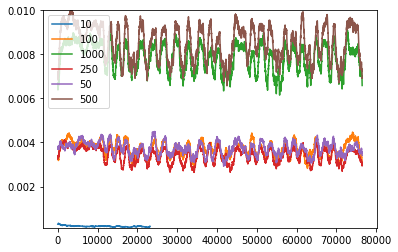

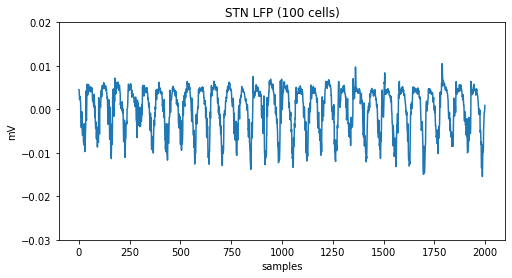

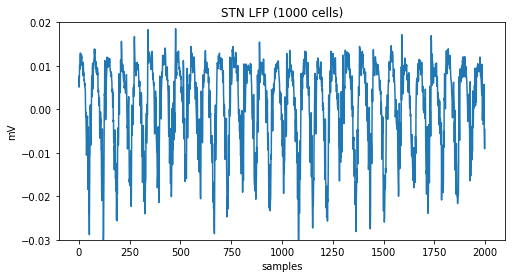

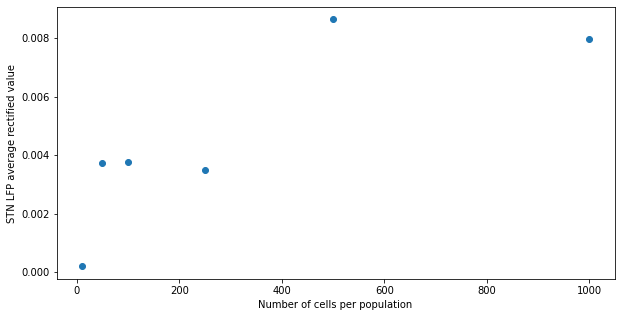

In [25]:
sizes = []
amplitudes = []
plt.figure()
ax = plt.gca()

for f in dir.iterdir():
    size = f.name.split('_')[-1].split('.')[0]
    sizes.append(int(size))
    
    lfp_file = sio.loadmat(f)
    segments, _, _ = lfp_file['block'][0, 0]
    segment = u.mat_to_dict(segments[0, 0][0, 0])
    lfp = u.mat_to_dict(segment['analogsignals'][0, 0][0, 0])
    if size == '1000' or size == '100':
        plt.figure(figsize=(8, 4), facecolor='white')
        plt.plot(lfp['signal'][2000:4000])
        plt.title(f'STN LFP ({size} cells)')
        plt.ylabel('mV')
        plt.xlabel('samples')
        plt.ylim([-0.03, 0.02])
    absolute_signal = abs(lfp['signal'])
    smoothed_signal = np.convolve(np.ones(1000) / 1000, absolute_signal[:, 0], 'valid')
    amplitudes.append(np.median(smoothed_signal))
    ax.plot(smoothed_signal)
    ax.set_ylim([0.000125, 0.01])

ax.legend(sizes)

plt.figure(figsize=(10, 5), facecolor='white')
plt.scatter(sizes, amplitudes)
plt.xlabel('Number of cells per population')
plt.ylabel('STN LFP average rectified value')

# plt.figure(lfp1000)